In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from skimage import io, exposure, transform
from sqlalchemy import create_engine

%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi']= 100

In [13]:
# read data from sql to pandas dataframe
eng = create_engine('sqlite:///db/data.sqlite3', echo=False)
df = pd.read_sql("select * from data", eng)
eng.dispose()

df.head(3)

,data_caption,data_category,data_creator,height,id,location_standard,meta_data_alto,meta_data_set_key,meta_data_subject_description,meta_data_subject_url,region_height,region_width,region_x,region_y,width,img_url_hash
0,NOTED BRITISHER WITH COMMISSION\nMaj. Gen. G. ...,Photograph,HARRIS & EWING,7667,5b3e1972d6342b00010020de,http://s3.amazonaws.com/ndnp-jpeg-surrogates/i...,http://s3.amazonaws.com/ndnp-batches/iune_edit...,http://chroniclingamerica.loc.gov/lccn/sn92053...,"Rock Island Argus. May 07, 1917. Page 7",http://chroniclingamerica.loc.gov/lccn/sn92053...,2522.340516,838.359451,810.293697,318.002816,5912,d01202098e04085845ba440e3a7d707e
1,Not That She Didn't Try\nHOW DO YOU LIKE MY HA...,Comics/Cartoon,C.A. VOIGHT,6451,5b21b9cdd6342b00010018a4,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,http://chroniclingamerica.loc.gov/lccn/sn83045...,"Evening public ledger. March 04, 1918. Page 13",http://chroniclingamerica.loc.gov/lccn/sn83045...,1020.800308,3646.961825,659.593274,261.743669,5104,9464687cd8a5d5df684cada809fddada
2,"HEAD OF THE VETERANS\nGen. George P. Harrison,...",Photograph,,9168,5b312a24d6342b0001001d7a,http://s3.amazonaws.com/ndnp-jpeg-surrogates/f...,http://s3.amazonaws.com/ndnp-batches/fu_criser...,http://chroniclingamerica.loc.gov/lccn/sn84027...,"The Ocala evening star. September 17, 1918. Pa...",http://chroniclingamerica.loc.gov/lccn/sn84027...,1613.238984,944.593873,2281.859784,7270.189167,6368,02fb7b34ab71235d9d59b34cec6dabe3


In [14]:
row = df.sample(1).iloc[0]

fname = 'images/{}.jpg'.format(row.img_url_hash)
reg_x = row.region_x
reg_y = row.region_y
reg_w = row.region_width
reg_h = row.region_height
w = row.width
h = row.height

print(h, w)


7173 5032


(7173, 5032)

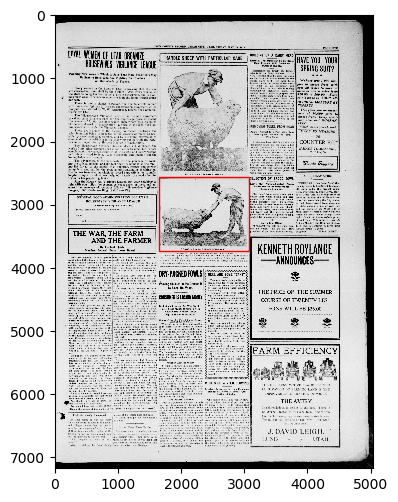

In [15]:
import matplotlib.patches as patches

img = mpimg.imread(fname)

fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')
rect = patches.Rectangle((reg_x, reg_y), reg_w, reg_h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

img.shape

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


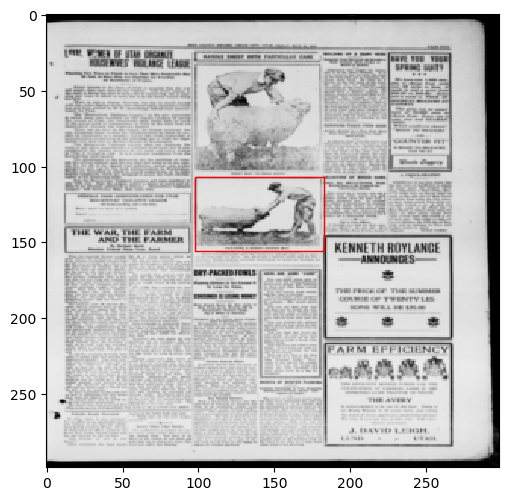

In [16]:
imgsm = transform.resize(img, (299, 299), anti_aliasing=True)
# imgsm = exposure.equalize_adapthist(imgsm, clip_limit=0.01)
# imgsm = exposure.rescale_intensity(imgsm)

# duplicate channels to fake an rgb image
imgsm = np.stack((imgsm,) * 3, -1)

x_scale = imgsm.shape[0] / w
y_scale = imgsm.shape[1] / h 
reg_xs = np.rint(x_scale * reg_x)
reg_ys = np.rint(y_scale * reg_y)
reg_ws = np.rint(x_scale * reg_w)
reg_hs = np.rint(y_scale * reg_h)

fig, ax = plt.subplots(1)
ax.imshow(imgsm) # don't need to specify grayscale, because it's a fake rgb image
rect = patches.Rectangle((reg_xs, reg_ys), reg_ws, reg_hs, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
